In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reducing memory of the data_set

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type != bool:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [20]:
games_df = reduce_mem_usage(pd.read_csv('games.csv',nrows = 25000))
print(" ")
games_df.info()

Memory usage of dataframe is 1.81 MB
Memory usage after optimization is: 1.03 MB
Decreased by 43.4%
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          25000 non-null  int32  
 1   title           25000 non-null  object 
 2   date_release    25000 non-null  object 
 3   win             25000 non-null  bool   
 4   mac             25000 non-null  bool   
 5   linux           25000 non-null  bool   
 6   rating          25000 non-null  object 
 7   positive_ratio  25000 non-null  int8   
 8   user_reviews    25000 non-null  int32  
 9   price_final     25000 non-null  float16
 10  price_original  25000 non-null  float16
 11  discount        25000 non-null  float16
 12  steam_deck      25000 non-null  bool   
dtypes: bool(4), float16(3), int32(2), int8(1), object(3)
memory usage: 1.0+ MB


In [5]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.992188,9.992188,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.990234,2.990234,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.992188,14.992188,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.992188,14.992188,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.992188,11.992188,0.0,True


In [6]:
print(games_df.shape)

(25000, 13)


In [7]:
games_df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [8]:
games_df.duplicated().sum()

0

### The main idea is to use 
1. content based filtering (done)
2. collaborative filtering 
> 1. by knn (done)
> 2. by matrix factorization
3. by neural networks(not sure)

# Content Based Filtering

In [9]:
# merging the games.csv with overview of games 
df_games_meta = pd.read_json('games_metadata.json', lines=True, orient="records")

merged_df = games_df.merge(df_games_meta, on='app_id', how='left')

In [10]:
merged_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.992188,9.992188,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.990234,2.990234,0.0,True,,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.992188,14.992188,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.992188,14.992188,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.992188,11.992188,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          25000 non-null  int32  
 1   title           25000 non-null  object 
 2   date_release    25000 non-null  object 
 3   win             25000 non-null  bool   
 4   mac             25000 non-null  bool   
 5   linux           25000 non-null  bool   
 6   rating          25000 non-null  object 
 7   positive_ratio  25000 non-null  int8   
 8   user_reviews    25000 non-null  int32  
 9   price_final     25000 non-null  float16
 10  price_original  25000 non-null  float16
 11  discount        25000 non-null  float16
 12  steam_deck      25000 non-null  bool   
 13  description     25000 non-null  object 
 14  tags            25000 non-null  object 
dtypes: bool(4), float16(3), int32(2), int8(1), object(5)
memory usage: 1.4+ MB


In [12]:
merged_df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
description       0
tags              0
dtype: int64

In [13]:
merged_df.head(2)['description']

0    Enter the dark underworld of Prince of Persia ...
1                                                     
Name: description, dtype: object

In [14]:
merged_df.shape

(25000, 15)

In [15]:
(merged_df.description == '').sum()

5698

In [16]:
(merged_df.tags == '').sum()

0

In [17]:
merged_dropped_df = merged_df[merged_df.description != '']
merged_dropped_df.drop(columns = ['rating','price_original','discount','steam_deck'],inplace=True)
merged_dropped_df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_10320\3244489934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dropped_df.drop(columns = ['rating','price_original','discount','steam_deck'],inplace=True)


,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,84,2199,9.992188,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,92,3722,14.992188,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,61,873,14.992188,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,88,8784,11.992188,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,METAL SLUG 3,2015-09-14,True,False,False,90,5579,7.988281,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."


In [18]:
merged_dropped_df.reset_index(inplace=True,drop=True)

In [19]:
merged_dropped_df.shape

(19302, 11)

In [20]:
(merged_dropped_df.description == '').sum()

0

In [21]:
merged_dropped_df[merged_dropped_df['tags'] == ''].index

Index([], dtype='int64')

for tag_list in merged_dropped_df_2.iloc['tags']:
    print(tag_list)

#converting tags in lower case

merged_dropped_df_2['tags'] = merged_dropped_df_2['tags'].map(lambda x: list(map(str.lower, x)))

In [22]:
merged_dropped_df.head()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,84,2199,9.992188,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,92,3722,14.992188,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
2,226560,Escape Dead Island,2014-11-18,True,False,False,61,873,14.992188,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
3,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,88,8784,11.992188,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
4,250180,METAL SLUG 3,2015-09-14,True,False,False,90,5579,7.988281,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
tfidf_matrix = tfidf.fit_transform(merged_dropped_df['tags'])

C:\Users\adity\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [25]:
# changing datatype to float32 to reduce the size of matrix
tfidf_matrix = tfidf_matrix.astype(np.float32)

In [26]:
tfidf_matrix

<19302x440 sparse matrix of type '<class 'numpy.float32'>'
	with 277801 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
np.info(cosine_similarities)

class:  ndarray
shape:  (19302, 19302)
strides:  (77208, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x240461bd040
byteorder:  little
byteswap:  False
type: float32


In [29]:
print(cosine_similarities)

[[1.         0.11841002 0.2902425  ... 0.02138782 0.02776869 0.01288863]
 [0.11841002 1.         0.20798786 ... 0.06144305 0.04810725 0.18735501]
 [0.2902425  0.20798786 1.0000001  ... 0.02404065 0.03121298 0.13901824]
 ...
 [0.02138782 0.06144305 0.02404065 ... 1.         0.01835446 0.04091856]
 [0.02776869 0.04810725 0.03121298 ... 0.01835446 1.0000001  0.06251881]
 [0.01288863 0.18735501 0.13901824 ... 0.04091856 0.06251881 1.        ]]


In [30]:
sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x : x[1])

[(0, 1.0),
 (6966, 0.819259),
 (13818, 0.7692456),
 (9352, 0.62272024),
 (3858, 0.57727706),
 (14122, 0.53723115),
 (10997, 0.5073534),
 (6611, 0.5025027),
 (13283, 0.49941248),
 (12983, 0.4955979),
 (2838, 0.47740033),
 (5816, 0.47246647),
 (1651, 0.46035475),
 (12265, 0.45947382),
 (18570, 0.4550084),
 (5, 0.4484213),
 (13119, 0.44805548),
 (10348, 0.44567043),
 (12500, 0.4453891),
 (8268, 0.44371295),
 (4583, 0.44187742),
 (4869, 0.43955952),
 (5157, 0.4322626),
 (5430, 0.42901915),
 (3715, 0.42767966),
 (1677, 0.42544326),
 (3359, 0.4222126),
 (11621, 0.4203862),
 (8039, 0.42012778),
 (5702, 0.4172555),
 (14008, 0.41677144),
 (13962, 0.4161651),
 (3925, 0.4160113),
 (6345, 0.41413468),
 (4022, 0.411345),
 (12951, 0.4066079),
 (10979, 0.40261114),
 (8774, 0.40175128),
 (11195, 0.40051782),
 (13369, 0.40051317),
 (14546, 0.40040937),
 (14210, 0.40040568),
 (7420, 0.40009114),
 (12641, 0.39983076),
 (1894, 0.39965206),
 (2585, 0.3983078),
 (14006, 0.3979648),
 (4918, 0.39787313),
 (12

In [65]:
def recommend(game):
    game_index = merged_dropped_df[merged_dropped_df['title'] == game].index[0]
    # game_index = merged_dropped_df[merged_dropped_df['title'].str.contains(game)]
    
    game_list = sorted(list(enumerate(cosine_similarities[game_index])),reverse=True,key=lambda x : x[1])[1:6]
    
    for i in game_list:
        print('\033[1m' + merged_dropped_df['title'].iloc[i[0]] + '\033[0m')
        print('Price : $',merged_dropped_df['price_final'].iloc[i[0]])
        print('Description :',merged_dropped_df['description'].iloc[i[0]])
        print('')   

In [66]:
recommend('Prince of Persia: Warrior Within™')

Prince of Persia®: The Sands of Time
Price : $ 9.99
Description : Amidst the scorched sands of ancient Persia, there is a legend spun in an ancient tongue. It speaks of a time borne by blood and ruled by deceit. Drawn to the dark powers of a magic dagger, a young Prince is led to unleash a deadly evil upon a beautiful kingdom.

Prince of Persia: The Two Thrones™
Price : $ 9.99
Description : The Prince of Persia, a seasoned warrior, returns from the Island of Time to Babylon with his love, Kaileena. Instead of the peace that he longs for, he finds his homeland ravaged by war and the kingdom turned against him.

Prince of Persia: The Forgotten Sands™
Price : $ 9.99
Description : Prince of Persia The Forgotten Sands is the next chapter in the fan-favorite Sands of Time universe. Visiting his brother's kingdom following his adventure in Azad, the Prince finds the royal palace under siege from a mighty army bent on its destruction.

Darksiders II Deathinitive Edition
Price : $ 29.98
Descrip

In [67]:
recommend('RPG in a Box')

Spriter Pro
Price : $ 60.0
Description : Spriter makes it easy for anyone, regardless of experience, to create 2D game animations using a technique called Modular Animation. Individual sprite pieces can be attached to bones and then easily animated with the powerful, yet easy to use toolset.

Substance 3D Designer 2023
Price : $ 150.0
Description : Adobe Substance 3D Designer is the industry's reference 3D Material Creation app. More than 95% of AAA game projects currently in development use Substance 3D as well as the most prestigious visual effects and animation studios.

Marmoset Hexels 3
Price : $ 49.0
Description : Marmoset Hexels™ is a grid-based painting tool for vector art, pixel art, design, and animation. A geometric canvas grid lets artists create complex pixel and vector designs with the stroke of a brush.

PixelOver
Price : $ 19.98
Description : PixelOver is a software to transform your arts to pixel arts as best as possible, animate in realtime with pixel perfect transfor

In [73]:
recommend('Elderand')

Slain: Back from Hell
Price : $ 12.99
Description : Slain: Back from Hell. A heavy metal inspired arcade combat with puzzle elements and gore galore. Stunning visuals and true old school gameplay accompanied by the most metal soundtrack you've ever heard.

The Tarnishing of Juxtia
Price : $ 24.98
Description : As the final creation of the Goddess, Juxtia, journey through the ruins of two divine kingdoms, overrun by the Tarnishing. Challenging combat, a hauntingly beautiful score, and a sinister narrative work in unison to make The Tarnishing of Juxtia an unforgettable 2D dark fantasy action RPG.

Castlevania: Lords of Shadow – Mirror of Fate HD
Price : $ 14.99
Description : This sequel to Castlevania: Lords of Shadow reveals the story of the Belmonts as they battle destiny across generations to discover their true fate. Trevor Belmont, knight of the Brotherhood of Light, embarks on an epic quest to avenge his mother who was killed by his father Gabriel.

Guild of Darksteel
Price : $ 12

# Collaborative Filtering

In [197]:
recommendations_df = reduce_mem_usage(pd.read_csv('recommendations.csv',nrows = 1000000))
print('')
recommendations_df.info()

Memory usage of dataframe is 54.36 MB
Memory usage after optimization is: 25.75 MB
Decreased by 52.6%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   app_id          1000000 non-null  int32  
 1   helpful         1000000 non-null  int16  
 2   funny           1000000 non-null  int16  
 3   date            1000000 non-null  object 
 4   is_recommended  1000000 non-null  bool   
 5   hours           1000000 non-null  float16
 6   user_id         1000000 non-null  int32  
 7   review_id       1000000 non-null  int32  
dtypes: bool(1), float16(1), int16(2), int32(3), object(1)
memory usage: 25.7+ MB


In [5]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.312500,49078,0
1,304390,4,0,2017-02-17,False,11.500000,2461,1
2,1085660,2,0,2019-11-17,True,336.500000,240559,2
3,703080,0,0,2022-09-23,True,27.406250,245798,3
4,526870,0,0,2021-01-10,True,7.898438,22629,4


In [198]:
recommendations_df.isnull().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [9]:
recommendations_df.drop(columns = ['helpful','funny','review_id'],inplace=True)

In [10]:
recommendations_df.head()

,app_id,date,is_recommended,hours,user_id
0,975370,2022-12-12,True,36.312500,49078
1,304390,2017-02-17,False,11.500000,2461
2,1085660,2019-11-17,True,336.500000,240559
3,703080,2022-09-23,True,27.406250,245798
4,526870,2021-01-10,True,7.898438,22629


In [167]:
# counting the values of is_recommended == True
is_recom_true = recommendations_df['is_recommended'].value_counts()[True]
is_recom_list = [is_recom_true,1000000-is_recom_true]
is_recom_list

[845194, 154806]

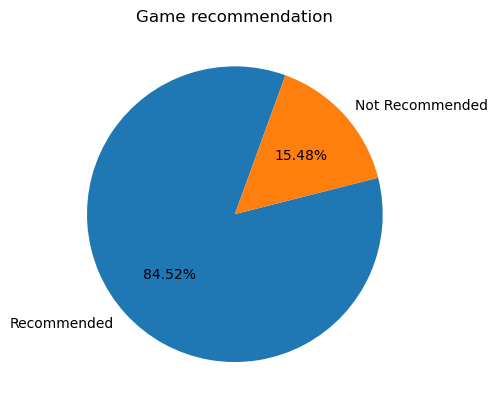

In [168]:
plt.pie(is_recom_list,labels = ['Recommended','Not Recommended'],startangle = 70,autopct='%1.2f%%')
plt.title('Game recommendation')
plt.show()

In [170]:
recommendations_df['hours'].describe()

count    1000000.0000
mean              NaN
std               NaN
min            0.0000
25%           31.0000
50%          100.3125
75%          285.0000
max         1000.0000
Name: hours, dtype: float64

In [15]:
# for knn, we have to make a user-item rating matrix
# but we do not have rating of every game by different users 
# so, we use no. of hours the user has put in that particular game as a rating towards the game
# higher hours means user enjoys the game more and vice versa

In [67]:
# taking user ids and app ids into a list to make a user item matrix
user_ids = recommendations_df['user_id'].astype('category').cat.codes
item_ids = recommendations_df['app_id'].astype('category').cat.codes

In [146]:
user_ids

0          355
1           19
2         1617
3         1645
4          172
         ...  
99995    45664
99996    45911
99997    47145
99998    47209
99999    47890
Length: 100000, dtype: int32

In [147]:
item_ids

0        115
1         44
2        122
3         99
4         75
        ... 
99995     18
99996    105
99997     35
99998    167
99999    132
Length: 100000, dtype: int16

In [25]:
type(user_ids)

pandas.core.series.Series

In [103]:
from scipy.sparse import coo_matrix

# making a sparse coordinate matrix using 'hours' with item_ids as rows and user_ids as columns
user_item_matrix = coo_matrix((recommendations_df['hours'],(item_ids,user_ids)))

In [104]:
user_item_matrix

<213x900303 sparse matrix of type '<class 'numpy.float16'>'
	with 1000000 stored elements in COOrdinate format>

In [118]:
print(user_item_matrix)

  (42, 0)	12.7
  (64, 1)	107.0
  (78, 2)	74.3
  (10, 3)	22.9
  (37, 3)	23.6
  (30, 4)	125.4
  (26, 5)	71.1
  (27, 5)	75.8
  (39, 6)	152.2
  (171, 7)	23.7
  (89, 8)	854.0
  (10, 9)	827.0
  (84, 10)	37.3
  (7, 11)	273.0
  (11, 12)	40.6
  (125, 13)	700.0
  (23, 14)	9.1
  (164, 14)	8.3
  (156, 15)	656.0
  (160, 16)	0.9
  (46, 17)	68.8
  (127, 18)	49.1
  (137, 19)	404.0
  (153, 20)	0.9
  (10, 21)	730.0
  :	:
  (173, 900283)	106.7
  (35, 900284)	52.3
  (134, 900285)	343.2
  (29, 900286)	69.3
  (184, 900287)	25.5
  (81, 900288)	12.5
  (22, 900289)	42.7
  (134, 900289)	343.8
  (139, 900289)	62.0
  (156, 900289)	82.8
  (19, 900290)	303.8
  (20, 900291)	400.8
  (184, 900291)	85.5
  (29, 900292)	600.5
  (77, 900293)	66.4
  (35, 900294)	121.3
  (67, 900295)	4.4
  (184, 900296)	366.0
  (29, 900297)	353.0
  (176, 900298)	0.1
  (188, 900299)	108.0
  (148, 900300)	43.7
  (118, 900301)	6.2
  (92, 900302)	27.1
  (200, 900302)	46.3


# **KNN : K - Nearest Neighbours**  
It is a technique used in machine learning that can be used in classification as well as regression. It can also be used in 
both supervised and unsupervised learning.

It is  **non-parametric** as it does not make any assumptions about data.  
It stores the training data and when a new data is introduced, it compares the new data with its 'k' nearest data points.  

It has 3 main algorithms(methods): 
1. Brute Force
2. KD Tree
3. Ball Tree  

**1. Brute Force**  
In this method, it uses brute force to compute all the distances between datapoints and time complexity is generally high for this method. (Not suitable for large datasets)  

**2. KD Tree (K Dimension Tree)**  
It is a optimised algorithm which uses the tree-based datastructure to reduce the time taken in computation. But as the dimension of the matrix becomes very large, KD Tree algorithm becomes inefficient.  

**3. Ball Tree**  
It overcomes the incompetence of KD Tree algorithm. It stores the data in hyperspheres called balls and each node in a Ball Tree is a hypersphere.  

KNN does not work well with large datasets as it stores the data points in memory and remember them for future computation.

In [105]:
user_item_matrix.shape

(213, 900303)

In [106]:
# number of non zero values in sparse matrix
coo_matrix.count_nonzero(user_item_matrix)

999962

In [143]:
# fitting the model using knn
# using NearestNeighbors as it is a unsupervised learner for implementing neighbour searches
from sklearn.neighbors import NearestNeighbors

# fitting using cosine similarity with brute force method
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [108]:
# getting unique user ids and item ids to search in the model matrix for recommendation
unique_user_ids = recommendations_df['user_id'].astype('category').cat.categories
unique_item_ids = recommendations_df['app_id'].astype('category').cat.categories

In [109]:
unique_user_ids

Index([       2,        9,       15,       52,       59,      110,      117,
            154,      161,      185,
       ...
       13651273, 13651294, 13651296, 13651321, 13651339, 13651410, 13651432,
       13651439, 13651444, 13651453],
      dtype='int32', length=900303)

In [110]:
unique_item_ids

Index([    440,     550,     570,     730,    4000,   22380,   39210,   42700,
         47890,  105600,
       ...
       1938090, 1942280, 1943950, 1976440, 1987080, 1997040, 2013360, 2064650,
       2167580, 2208920],
      dtype='int32', length=213)

In [54]:
# notice that length of unique_user_ids and unique_item_ids are of dimensions of user_item_matrix

In [161]:
# finding the k nearest neighbour of game index = 0
distances,indices = model_knn.kneighbors(user_item_matrix.getrow(3),n_neighbors = 6)

In [162]:
distances

array([[0.        , 0.99557248, 0.99658171, 0.99705286, 0.99712349,
        0.99795023]])

In [163]:
indices

array([[ 3, 36, 86, 14, 29, 52]], dtype=int64)

In [164]:
similar_app_ids = [unique_item_ids[i] for i in indices.flatten()]
similar_app_ids

[730, 271590, 578080, 218620, 252490, 359550]

In [177]:
# unique_merged_df consists of the games with their information
unique_merged_df = reduce_mem_usage(pd.read_csv('unique_merged_df.csv'))

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 31.1%


In [196]:
unique_merged_df.head()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,description,tags
0,440,Team Fortress 2,2007-10-10,True,True,True,93,960279,0.000000,Nine distinct classes provide a broad range of...,"['Free to Play', 'Hero Shooter', 'Multiplayer'..."
1,550,Left 4 Dead 2,2009-11-16,True,True,True,97,547784,9.992188,"Set in the zombie apocalypse, Left 4 Dead 2 (L...","['Zombies', 'Co-op', 'FPS', 'Multiplayer', 'Sh..."
2,570,Dota 2,2013-07-09,True,True,True,82,1998934,0.000000,"Every day, millions of players worldwide enter...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat..."
3,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,88,7297791,14.992188,Counter-Strike: Global Offensive (CS: GO) expa...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
4,4000,Garry's Mod,2006-11-29,True,True,True,96,827095,9.992188,Garry's Mod is a physics sandbox. There aren't...,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable'..."


In [193]:
def recommend_collab(game):
    
    # finding the game's index 
    game_index = unique_merged_df[unique_merged_df['title'] == game].index[0] 
    
    #getting the recommendations
    indices = model_knn.kneighbors(user_item_matrix.getrow(game_index),n_neighbors = 6,return_distance = False)

    for ind in indices.flatten()[1:]:
        print('\033[1m' + unique_merged_df['title'].iloc[ind] + '\033[0m')
        print('Price : $',unique_merged_df['price_final'].iloc[ind])
        print('Description :', unique_merged_df['description'].iloc[ind])
        print('')

In [194]:
recommend_collab('Counter-Strike: Global Offensive')

Grand Theft Auto V
Price : $ 0.0
Description : Grand Theft Auto V for PC offers players the option to explore the award-winning world of Los Santos and Blaine County in resolutions of up to 4k and beyond, as well as the chance to experience the game running at 60 frames per second.

PUBG: BATTLEGROUNDS
Price : $ 0.0
Description : Play PUBG: BATTLEGROUNDS for free. Land on strategic locations, loot weapons and supplies, and survive to become the last team standing across various, diverse Battlegrounds. Squad up and join the Battlegrounds for the original Battle Royale experience that only PUBG: BATTLEGROUNDS can offer.

PAYDAY 2
Price : $ 9.99
Description : PAYDAY 2 is an action-packed, four-player co-op shooter that once again lets gamers don the masks of the original PAYDAY crew - Dallas, Hoxton, Wolf and Chains - as they descend on Washington DC for an epic crime spree.

Rust
Price : $ 40.0
Description : The only aim in Rust is to survive. Everything wants you to die - the island’s w

In [195]:
recommend_collab('Call of Duty®: Black Ops')

Fallout: New Vegas
Price : $ 9.99
Description : Welcome to Vegas. New Vegas. Enjoy your stay!

Call of Duty®: Black Ops II
Price : $ 19.8
Description : Pushing the boundaries of what fans have come to expect from the record-setting entertainment franchise, Call of Duty®: Black Ops II propels players into a near future Cold War

Call of Duty®: Black Ops III
Price : $ 19.8
Description : Call of Duty®: Black Ops III Zombies Chronicles Edition includes the full base game plus the Zombies Chronicles content expansion.

Dead by Daylight
Price : $ 19.98
Description : Dead by Daylight is a multiplayer (4vs1) horror game where one player takes on the role of the savage Killer, and the other four players play as Survivors, trying to escape the Killer and avoid being caught and killed.

Arma 3
Price : $ 29.98
Description : Experience true combat gameplay in a massive military sandbox. Deploying a wide variety of single- and multiplayer content, over 20 vehicles and 40 weapons, and limitless oppor